## Overfitting:
occurs when a machine learning model learns the details and noise in the training data so well that it negatively impacts its performance on new, unseen data. In essence, the model memorizes the training examples rather than learning the generalized, underlying patterns or relationships. 

Overfitting is like memorizing every single practice question and answer key word-for-word. The student will perform perfectly on a test with those exact questions. However, if the actual exam has slightly different questions on the same topics, the student will struggle because they never truly understood the concepts – they just memorized the specific examples. 

## Underfitting 
is when a machine learning model is too simple and fails to learn the basic patterns in data, making it perform poorly on both the data it trained on and new data, like a student who barely studies and fails every test because they didn't grasp the subject at all. It's like trying to fit a curved line to data with a straight line – you miss the actual trend. 

## Ridge Regression (L2 Regression)

What problem does it solve?

Ridge Regression is used to reduce overfitting in Linear Regression models, especially when the model performs well on training data but poorly on test or unseen data.

Intuition (Simple Explanation)

In simple terms, Ridge Regression adds a penalty to large coefficients so that the model does not rely too heavily on any single feature.
This makes the model more stable and better at generalizing to new data.

#### When Do We Use Ridge Regression?

We use Ridge Regression when:

Training accuracy is high

Test accuracy is low

Model has high variance

Data is sensitive to small changes (new variants of data reduce accuracy)

This indicates overfitting, and Ridge Regression helps control it.

How Ridge Regression Reduces Overfitting

#### Ridge Regression:

Adds an L2 penalty to the Linear Regression loss function

Penalizes the square of the coefficients

Shrinks coefficients toward zero (but never exactly zero)

This reduces the impact of features that are less relevant to the target variable, making the model less complex.

Loss = Sum of squared errors + λ * (sum of squared coefficients)


Important Parameters

λ (lambda / alpha)

Higher value → more regularization → lower variance

Lower value → closer to linear regression


#### Pros

Reduces overfitting

Works well when features are correlated

Improves model stability

Simple and efficient

#### Cons

Does not perform feature selection (coefficients never become zero)

Less interpretable than simple linear regression


#### When to Use

Linear Regression is overfitting

Many features affect the output

Multicollinearity exists


Common Interview Questions

Q1. Why does Ridge Regression reduce overfitting?
👉 Because it penalizes large coefficients, reducing model complexity and variance.

Q2. Difference between Linear and Ridge Regression?
👉 Ridge adds an L2 penalty term to the loss function, Linear Regression does not.

Q3. What happens if lambda is very large?
👉 Coefficients shrink heavily, model may underfit.

### Regularization means:
Controlling the model so it does not learn too much.

In simple terms:

Model learns too much → overfitting 

Regularization adds a limit so the model stays simple 

Think like this:

Regularization = telling the model “don’t depend too much on any one feature”

## Lasso Regression (L1 Regularization)

What problem does it solve?

Lasso Regression is used to:

Reduce overfitting

Perform automatic feature selection when there are many features

Lasso:

Penalizes less important features

Pushes some coefficients exactly to zero

Features with zero coefficient are removed automatically

#### We use Lasso when:

Dataset has many features

Not all features are important

Manual feature selection is difficult

#### How Lasso Works (Simple)

 Lasso adds an L1 penalty to Linear Regression.

Effect:

Small coefficients → become zero

Important coefficients → remain

#### Important Parameter

λ (lambda / alpha)

Controls strength of regularization

High λ → more features removed

Low λ → close to linear regression


#### Pros

Automatic feature selection

Reduces overfitting

Simple and interpretable

#### Cons

Can remove useful features if λ is too high

Not stable when features are highly correlated

#### When to Use

Too many features

Need a simpler model

Want to know which features matter

#### Elastic Net Regression

What problem does it solve?

Elastic Net Regression is used when:

The model is overfitting

There are many features

We also need automatic feature selection

Elastic Net is a combination of Ridge and Lasso.

In simple words:

Ridge controls overfitting

Lasso removes useless features

Elastic Net does both together

#### How Elastic Net Works (High Level)

Elastic Net adds two penalties to Linear Regression:

L1 penalty (from Lasso)

L2 penalty (from Ridge)
So it:

Shrinks coefficients

Sets some coefficients to zero

Improves generalization

#### Important Parameters (Interview Level)

α (alpha) → controls overall regularization strength

l1_ratio → controls balance between Lasso and Ridge

Example:

l1_ratio = 1 → pure Lasso

l1_ratio = 0 → pure Ridge


#### Pros

Combines benefits of Ridge and Lasso

More stable than Lasso

Good for high-dimensional data

#### Cons

More hyperparameters to tune

Slightly more complex

## What is Cross Validation?

Cross Validation is a technique used to:

Evaluate model performance more reliably

Tune hyperparameters

Reduce the risk of overfitting

Instead of using only one train-test split, we:

Split training data into multiple train + validation sets

Train and validate the model multiple times

Take the average performance


Dataset:->training , testing-> 
traning: train + validation this is the layer of hyperparameter tuning 


#### Typical ML Flow
Split data → Train + Test

Apply cross validation on training data

Perform hyperparameter tuning

Select best model

Final evaluation on test data

#### Random State 

random_state ensures same data split every time

Helps in reproducibility

Without it, results may change each run


## Types of Cross Validation

#### 1 Leave One Out Cross Validation (LOOCV)

How it works:

1 data point → validation

Remaining data → training

Repeat for N experiments (N = total samples)

Pros:

Uses almost all data for training

Cons (Important Interview Point):

Very slow for large datasets

High variance

Not practical for large data

#### 2. Leave P Out Cross Validation

How it works:

P data points → validation

Remaining → training

Repeat multiple times

Cons:

Computationally very expensive

Rarely used in practice

#### 3. K-Fold Cross Validation (Most Important)

Example:

Total data = 500 rows

K = 5

Validation size = 500 / 5 = 100

Process:

5 experiments

Each time:

100 rows → validation

400 rows → training

Get 5 accuracies

Take the average accuracy

#### 4. Stratified K-Fold Cross Validation

Why needed?

For imbalanced datasets (e.g., classification)

Example:

Validation size = 100

Class ratio in full data = 60% (class 1), 40% (class 0)

Stratified K-Fold keeps same ratio in every fold

📌 Mostly used for classification problems

#### 5. Time Series Cross Validation

Used when:

Data has time order (stock price, sales, weather)

Key Rule:

No random shuffling

Train on past data

Validate on future data
simply data for the validation is selected on the basis of days
example 10 days data k is 4 means 4 is for validation and 6 is for training like this will do the experiments and calculate the avg accuracy.

In [72]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
import pandas as pd

In [74]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
print(df.head(5))

  day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire     


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### data cleaning

In [76]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [77]:
# findi out which are the rows which have null values 
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


##### the dataset is converted into two parts based on region one is bagia region and other is sidi bell region so till 122 first will represnet as 0 and sidibell as 1 will make seprate column as a region

In [78]:
df.loc[0:122,'Region']=0
df.loc[122:,'Region']=1

In [79]:
df.info

<bound method DataFrame.info of     day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    Region  
0    0.5  

In [80]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [81]:
df['Region'].isna().sum()


np.int64(0)

In [82]:
df[['Region']]=df[['Region']].astype(int)

In [83]:
df['Region'].isnull().sum()

np.int64(0)

In [84]:
# remove the 122nd row which is repeated column names

df=df.drop(index=122).reset_index(drop=True)

In [85]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [86]:

df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [87]:
df.columns=df.columns.str.strip()
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          245 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       245 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.8+ KB


In [88]:
df=df.drop(index=122).reset_index(drop=True)

In [89]:
df[df['day'] == 'day']


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


#### change the required columns as integer type

In [90]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int64 
 1   month        244 non-null    int64 
 2   year         244 non-null    int64 
 3   Temperature  244 non-null    int64 
 4   RH           244 non-null    int64 
 5   Ws           244 non-null    int64 
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.7+ KB


### change other columns to float

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int64 
 1   month        244 non-null    int64 
 2   year         244 non-null    int64 
 3   Temperature  244 non-null    int64 
 4   RH           244 non-null    int64 
 5   Ws           244 non-null    int64 
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.7+ KB


In [93]:
objects=[feature for feature in df.columns if df[feature].dtypes=='object']

In [94]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [95]:
# remove that 14.6 9 string
mask = df.apply(
    lambda row: row.astype(str).str.contains('14.6 9').any(),
    axis=1
)

df.loc[mask] = df.loc[mask].replace('14.6 9', '14.6')


C:\Users\ddurande\AppData\Local\Temp\ipykernel_9704\1346649828.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[mask] = df.loc[mask].replace('14.6 9', '14.6')


In [96]:
df[df['FWI'].astype(str).str.strip() == 'fire']


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6,12.5,10.4,fire,NaN,1


In [97]:
# Step 1: Convert FWI to numeric (fire -> NaN)
df['FWI'] = pd.to_numeric(df['FWI'], errors='coerce')

# Step 2: Fill NaN (including row 65) with mean
df['FWI'] = df['FWI'].fillna(df['FWI'].mean())


In [98]:
for i in objects:
    if i != 'Classes':
        try:
            df[i]=df[i].astype(float)
        except ValueError as e:
            print(f"\n❌ Error in column: {i}")
            print(e)

            bad_rows = df.loc[
                ~df[i].astype(str).str.match(r'^\s*-?\d+(\.\d+)?\s*$', na=False),
                i
            ]

            print("\n🚫 Problematic rows:")
            print(bad_rows)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.7+ KB


In [100]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

### drop day month year

In [101]:
df_copy=df.copy()

In [102]:
df_copy.drop(['day','month','year'],axis=1,inplace=True)

In [103]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [104]:
import numpy as np
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.7+ KB


In [106]:
# do the encoding of the catagories and classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)


# df_copy['Classes'] = np.where(
#     df_copy['Classes'].str.strip().str.lower().str.contains('fire'),
#     1,
#     0
# )

In [107]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [108]:
df_copy['Classes'].value_counts()

Classes
1    137
0    107
Name: count, dtype: int64

In [109]:
# Matplotlib for plotting
import matplotlib.pyplot as plt

# Seaborn for advanced statistical plots
import seaborn as sns

# Optional: make plots appear inline in Jupyter notebooks
%matplotlib inline


What bins means

A histogram shows the distribution of numeric data by grouping values into intervals.

Each interval is called a bin.

The bins parameter controls how many bins (intervals) you want.

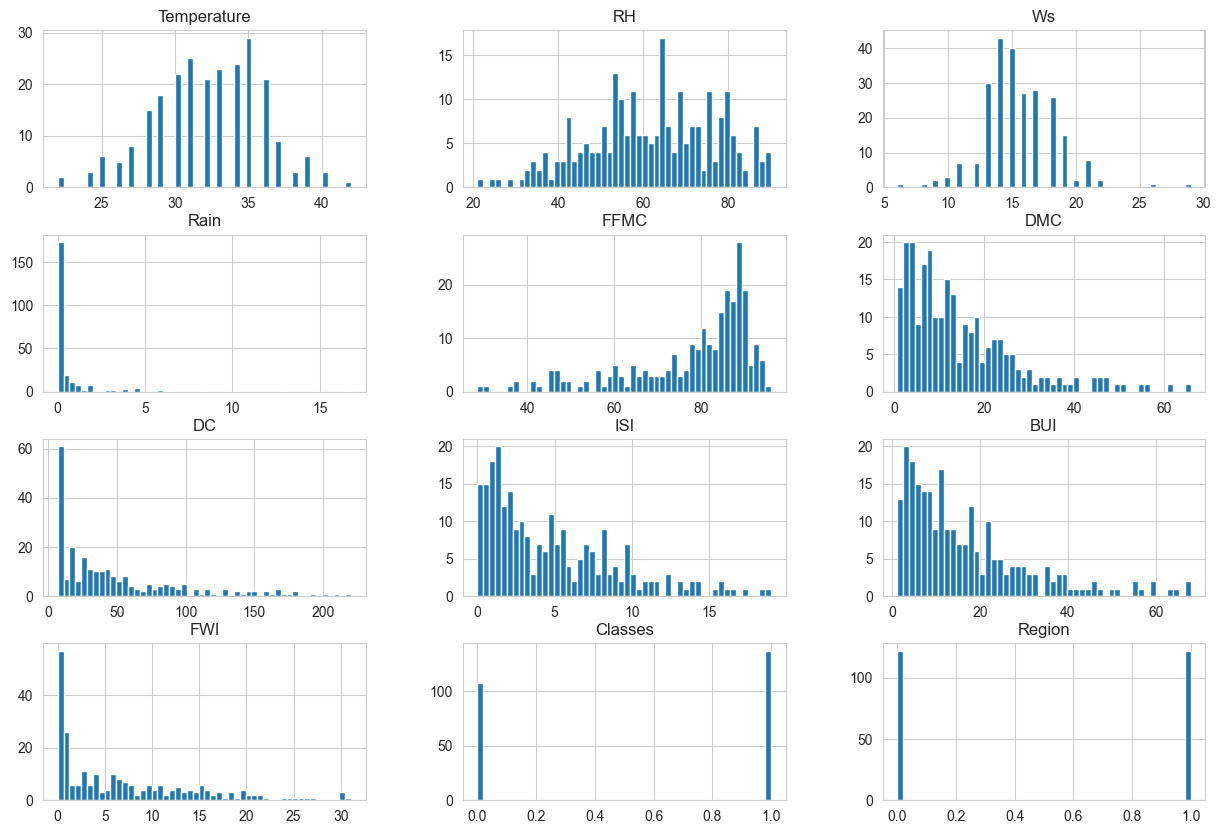

In [110]:
sns.set_style("whitegrid") 
df_copy.hist(bins=50, figsize=(15, 10))
plt.show()

In [111]:
# percentage for piechart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

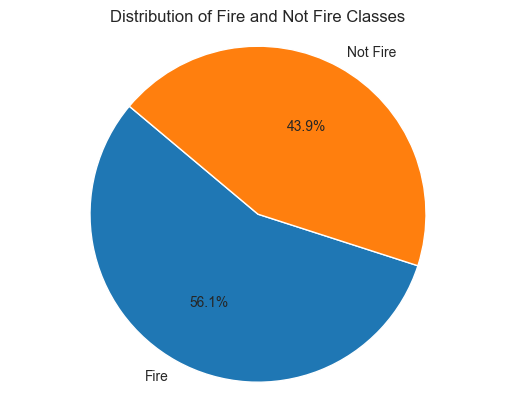

<Figure size 1200x700 with 0 Axes>

In [112]:
classlabes=['Fire','Not Fire']
plt.pie(percentage, labels=classlabes,autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.  
plt.title('Distribution of Fire and Not Fire Classes')
plt.figure(figsize=(12,7))
plt.show()

In [113]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.564599,0.506575,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.577577,-0.420695,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.032315,-0.073810,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.324369,-0.376727,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.690289,0.762942,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.875827,0.584757,0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.738709,0.512615,-0.081489
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.916343,0.719419,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.857628,0.586915,0.087370
FWI,0.564599,-0.577577,0.032315,-0.324369,0.690289,0.875827,0.738709,0.916343,0.857628,1.000000,0.717319,0.196696


<Axes: ylabel='FWI'>

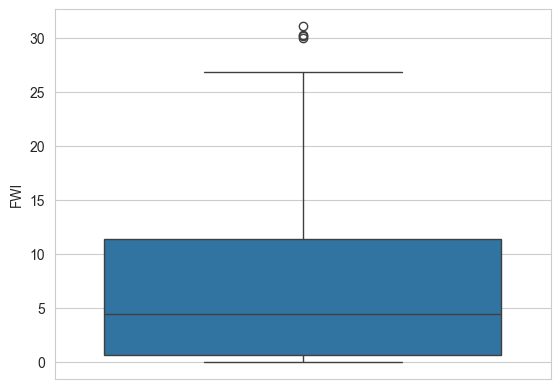

In [114]:
sns.boxplot(df_copy['FWI'])

Text(0.5, 1.0, 'Monthly Distribution of Fire and Not Fire Classes')

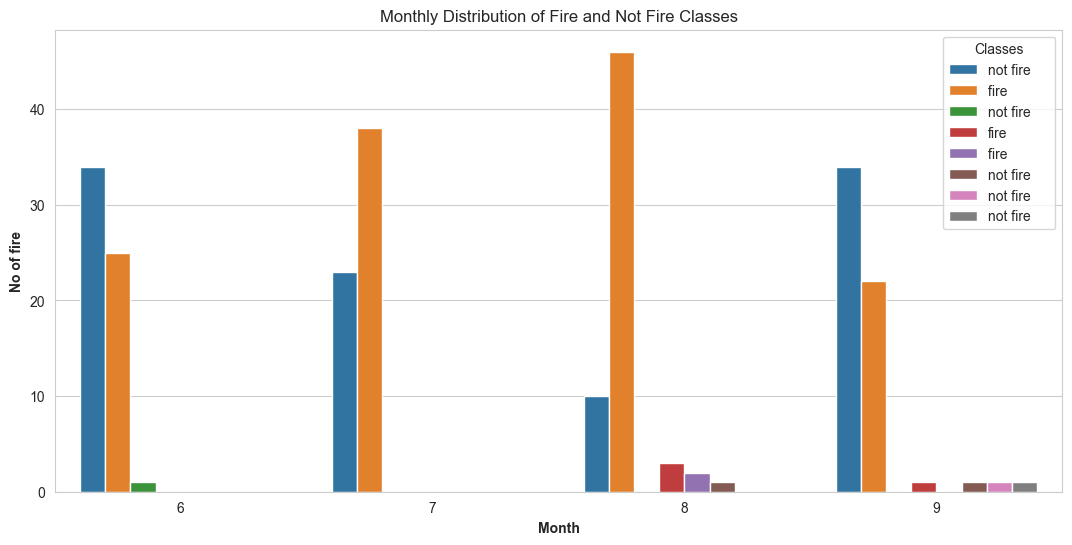

In [115]:
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x='month', hue='Classes', data=df)
plt.ylabel('No of fire',weight='bold')
plt.xlabel('Month',weight='bold')
plt.title('Monthly Distribution of Fire and Not Fire Classes')

### more fire occurs in the months of June, July, August and September which are summer months in Algeria. here we need only two classes 1 and 0 but coming multiple because delted month so thats why cant use df_copy

In [116]:
df_copy.head()
df_copy['Classes'].value_counts()

Classes
1    137
0    107
Name: count, dtype: int64

In [117]:
# create X and y dependent and independent features
# y is output feature
X=df_copy.drop('FWI',axis=1)
Y=df_copy['FWI']

In [118]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [119]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [120]:
X_train.shape

(183, 11)

What is Correlation?

Correlation tells us:

How two variables move with respect to each other

It answers:

When one increases, what happens to the other?

Types of Correlation (Very Simple)
1️⃣ Positive Correlation (+ve)

Meaning:

When one variable increases, the other also increases

Simple Example:

Study hours ↑ → Marks ↑

Experience ↑ → Salary ↑

📌 Graph looks like an upward sloping line

Correlation value:

Between 0 and +1

+1 → perfect positive correlation

2️⃣ Negative Correlation (−ve)

Meaning:

When one variable increases, the other decreases

Simple Example:

Price ↑ → Demand ↓

Speed ↑ → Time taken ↓

📌 Graph looks like a downward sloping line

Correlation value:

Between 0 and −1

−1 → perfect negative correlation

3️⃣ Zero Correlation

Meaning:

No relationship between variables

Simple Example:

Shoe size vs Intelligence

Roll number vs Marks

📌 Points are random, no pattern

Correlation value:

Around 0

In [121]:
# Correlation

In [122]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.564599,0.506575,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.577577,-0.420695,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.032315,-0.073810,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.324369,-0.376727,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.690289,0.762942,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.875827,0.584757,0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.738709,0.512615,-0.081489
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.916343,0.719419,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.857628,0.586915,0.087370
FWI,0.564599,-0.577577,0.032315,-0.324369,0.690289,0.875827,0.738709,0.916343,0.857628,1.000000,0.717319,0.196696


<Axes: >

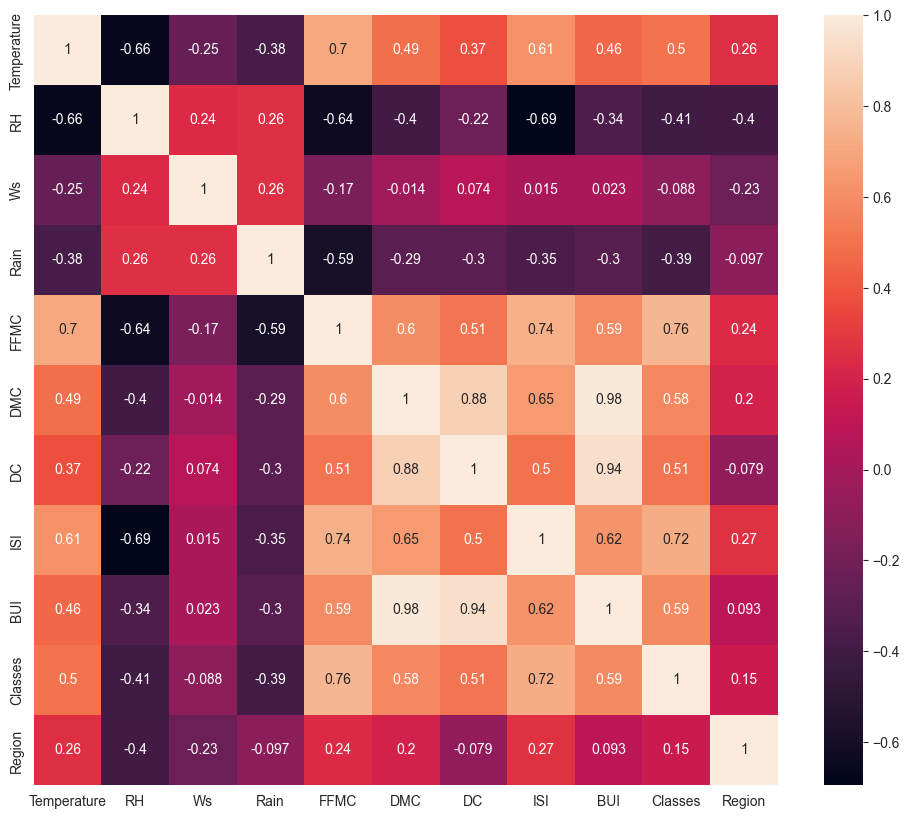

In [123]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [124]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # due to abs value +ve _ve correlation will handle
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [125]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

Core idea:
Highly correlated features carry almost the same information.

So:

Keeping both does not add value

It increases multicollinearity

It can cause overfitting and unstable coefficients

It calculates the correlation matrix

If correlation between two features is greater than 0.85

It keeps one feature and removes the other

In [126]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((183, 9), (61, 9))

## Feature Scaling Or Standardization

1. What is Feature Scaling?

Feature scaling is the process of bringing all features to the same scale so that no feature dominates the model because of its large values.

2. Why Do We Need Feature Scaling?

Different features can have very different ranges.

Example:

Age → 18 to 60

Salary → 20,000 to 1,00,000

Without scaling:

Model gives more importance to salary only because numbers are bigger ❌

With scaling:

All features are treated equally ✅

3. What is Standardization?

Standardization is a type of feature scaling where:

Mean = 0

Standard deviation = 1

Formula:

X_scaled = (X − mean) / standard deviation


fit_transform(X_train)
→ Calculates mean & std from training data
→ Scales training data

transform(X_test)
→ Uses same mean & std
→ Scales test data

In [127]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [128]:
X_train_scaled

array([[-0.81085018,  0.16311382,  1.29231566, ..., -0.773495  ,
        -1.0976426 , -1.00547949],
       [ 1.06405791, -0.44884168,  0.15167049, ...,  0.83939993,
         0.91104336,  0.99455037],
       [-0.27516216,  0.63907922, -0.60875963, ..., -0.21981465,
         0.91104336,  0.99455037],
       ...,
       [-1.88222624,  0.91105944,  0.53188555, ..., -1.08644476,
        -1.0976426 , -1.00547949],
       [ 0.26052587, -0.38084663,  0.15167049, ...,  0.47830405,
         0.91104336,  0.99455037],
       [-0.54300617,  0.9790545 ,  2.05274578, ..., -0.86978723,
        -1.0976426 , -1.00547949]], shape=(183, 9))

### Box Plots To understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

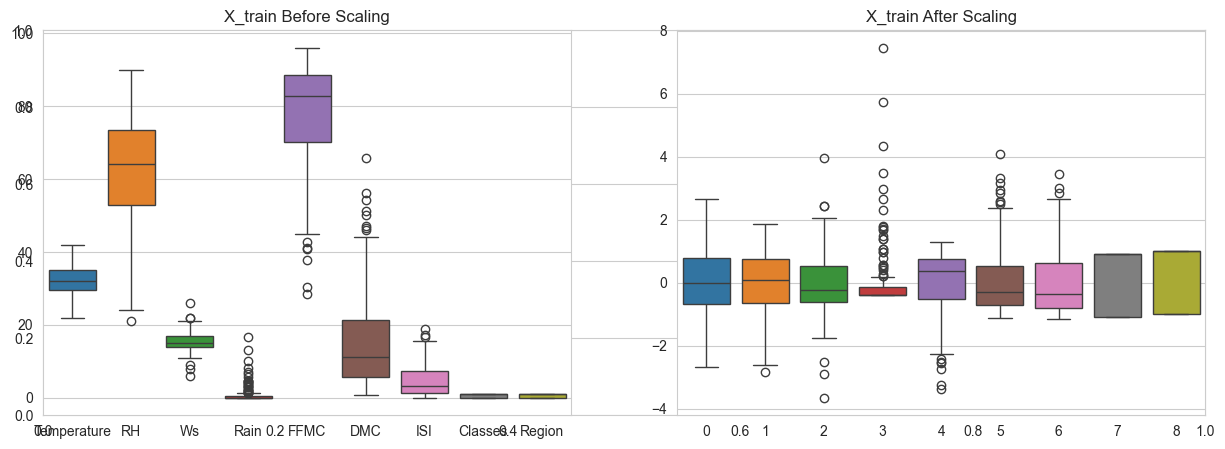

In [129]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# all is near to same scale now

## Trains a Linear Regression model

Makes predictions on test data

Evaluates how good the predictions are using MAE and R² score

Visualizes results using a scatter plot

LinearRegression → model used for prediction

mean_absolute_error → measures prediction error

r2_score → measures how well the model fits the data

Step 3: Train the Model
linreg.fit(X_train_scaled, y_train)


Model learns the relationship between:

Input features (X_train_scaled)

Target values (y_train)

This step is called training

Step 4: Make Predictions
y_pred = linreg.predict(X_test_scaled)


Model predicts output for unseen test data

y_pred = predicted values

Model Evaluation Metrics
5. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)


What it means:

Average absolute difference between actual and predicted values

Example:

MAE = 5
→ On average, predictions are off by 5 units

📌 Lower MAE = better model

6. R² Score (Coefficient of Determination)
score = r2_score(y_test, y_pred)


What it means:

How much of the variation in output is explained by the model

Range:

1 → perfect model

0 → model is no better than mean

Negative → very poor model

Example:

R² = 0.85
→ Model explains 85% of the variance

📌 Higher R² = better model

Step 8: Scatter Plot (Visual Check)
plt.scatter(y_test, y_pred)


What this shows:

X-axis → actual values (y_test)

Y-axis → predicted values (y_pred)

📌 If points form a straight diagonal line, model is good
📌 If points are scattered randomly, model is weak

Mean absolute error 0.626077792128666
R2 Score 0.988214427147382


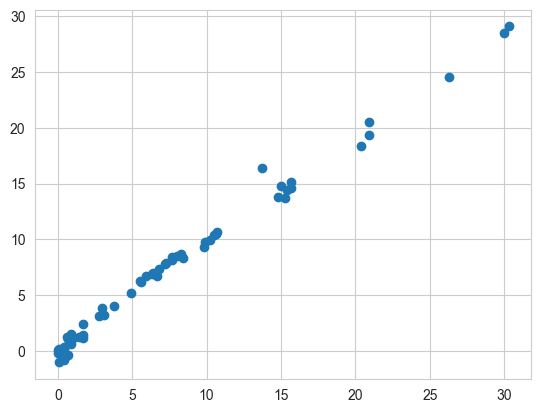

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
# lower mae better model 
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Lasso Regression

Mean absolute error 1.222772061468996
R2 Score 0.9498780896144685


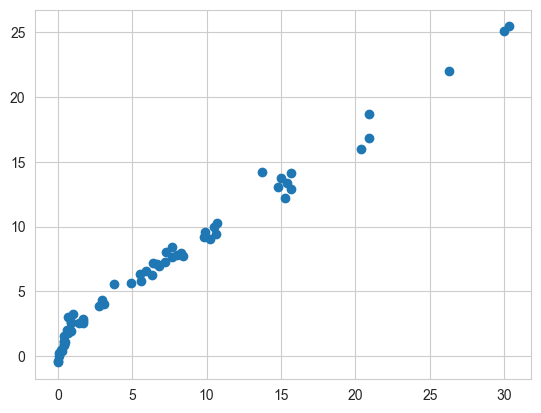

In [131]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

# If the accuracy is reduce we cant say previous was well previous can be overfitting

### cross validation for lasso

1. What is LassoCV?

LassoCV is Lasso Regression with built-in Cross Validation.

👉 It automatically:

Tries different alpha (λ) values

Uses cross validation

Selects the best alpha

Trains the final Lasso model

2. What Does This Code Do?
from sklearn.linear_model import LassoCV


Imports Lasso with cross validation.

lassocv = LassoCV(cv=5)


cv=5 → Uses 5-fold cross validation

Model will split training data into 5 parts

Each time, one part is validation and rest is training

lassocv.fit(X_train_scaled, y_train)


Trains Lasso model

Tests multiple alpha values

Chooses the best alpha based on cross-validation performance

lassocv.alphas_


Returns the list of alpha values that were tested

Alpha controls the strength of regularization

3. Why Do We Use LassoCV?

Manual hyperparameter tuning is difficult

LassoCV automates alpha selection

Prevents overfitting

Performs feature selection

In [132]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [133]:
lassocv.predict(X_test_scaled)

array([ 8.32823376,  7.7753001 ,  6.92765697,  6.56540767, 13.81022353,
        1.35762131, 10.61631092, -1.07921519,  1.70695333, -0.41688664,
        0.41423166,  4.19532355,  1.60472467,  1.43799699, 18.25733425,
        6.8906222 , 24.47213883, -0.23809453,  7.44878423,  5.17205647,
        1.49933528,  0.15288918,  8.11630495,  0.12747893, 20.47834101,
       -0.0665476 ,  6.12309051,  9.90661228,  3.84622237, 14.70390758,
        8.6131263 , -0.59123817, 10.43440777, 14.56611435,  1.28746836,
        1.39762727,  0.77999735,  6.15179759, -0.51021225, -0.42304774,
        6.79549068,  3.27857516,  3.04389524, -0.45353283, 15.12699532,
        8.49563911,  8.58225858,  1.29652674, 10.2403892 ,  9.29460551,
       28.77393119,  2.3968518 ,  8.09671023, 19.2913281 , 13.65810849,
       16.31192603, 28.24127402, -0.35018539, -0.47586566, 14.27924111,
        9.82163137])

In [134]:
lassocv.alpha_

np.float64(0.028746273810409825)

In [135]:
lassocv.alphas_

array([6.64076209, 6.19319695, 5.7757962 , 5.38652687, 5.02349299,
       4.68492637, 4.36917802, 4.07471004, 3.80008822, 3.54397499,
       3.30512294, 3.08236872, 2.87462738, 2.68088712, 2.5002043 ,
       2.3316989 , 2.17455019, 2.02799279, 1.89131286, 1.76384471,
       1.64496748, 1.53410217, 1.43070882, 1.33428384, 1.24435757,
       1.16049203, 1.08227876, 1.00933679, 0.94131087, 0.87786967,
       0.81870419, 0.76352627, 0.71206715, 0.66407621, 0.6193197 ,
       0.57757962, 0.53865269, 0.5023493 , 0.46849264, 0.4369178 ,
       0.407471  , 0.38000882, 0.3543975 , 0.33051229, 0.30823687,
       0.28746274, 0.26808871, 0.25002043, 0.23316989, 0.21745502,
       0.20279928, 0.18913129, 0.17638447, 0.16449675, 0.15341022,
       0.14307088, 0.13342838, 0.12443576, 0.1160492 , 0.10822788,
       0.10093368, 0.09413109, 0.08778697, 0.08187042, 0.07635263,
       0.07120672, 0.06640762, 0.06193197, 0.05775796, 0.05386527,
       0.05023493, 0.04684926, 0.04369178, 0.0407471 , 0.03800

In [136]:
lassocv.mse_path_

array([[58.58419754, 43.76850724, 54.61786113, 72.91709755, 37.03534792],
       [53.59568439, 39.22807509, 50.06806283, 69.7558873 , 32.61350576],
       [48.06413432, 34.67365526, 43.74573369, 63.755404  , 28.59114109],
       [42.47683898, 30.68917059, 38.14919682, 58.44720076, 24.57314067],
       [37.5967684 , 27.20196564, 33.28314049, 53.74712517, 21.15421184],
       [33.33348763, 24.14871678, 29.05223641, 49.5815802 , 18.25113147],
       [29.60776131, 21.4742727 , 25.37351288, 45.17972024, 15.79171856],
       [26.35076814, 19.13056643, 22.17526555, 39.92015804, 13.71423104],
       [23.50257035, 17.07570596, 19.39468306, 35.32157143, 11.9645469 ],
       [21.01096194, 15.27319427, 16.97729067, 31.29924144, 10.49611363],
       [18.83024326, 13.69115992, 14.87571399, 27.77964082,  9.26870222],
       [16.92126799, 12.30186476, 13.04875382, 24.69871622,  8.24756589],
       [15.24926587, 11.0811022 , 11.46040601, 22.00004964,  7.40252405],
       [13.78415751, 10.00775807, 10.0

Mean absolute error 0.6621278804665193
R2 Score 0.9873762093914311


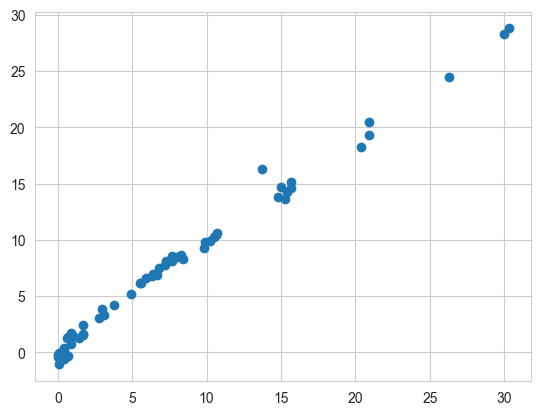

In [137]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

## Ridge Regression model

Mean absolute error 0.6464137712540027
R2 Score 0.9874737072473474


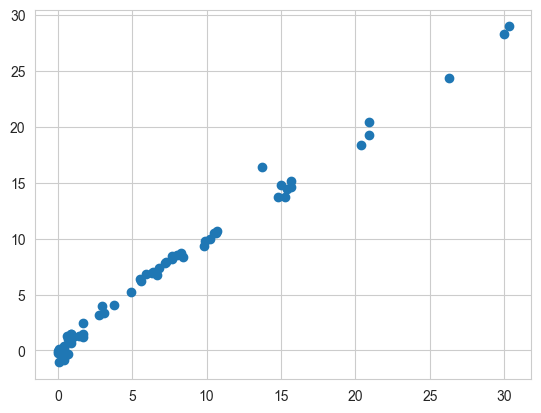

In [138]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

#### cross validation for ridge

Mean absolute error 0.6464137712540027
R2 Score 0.9874737072473474


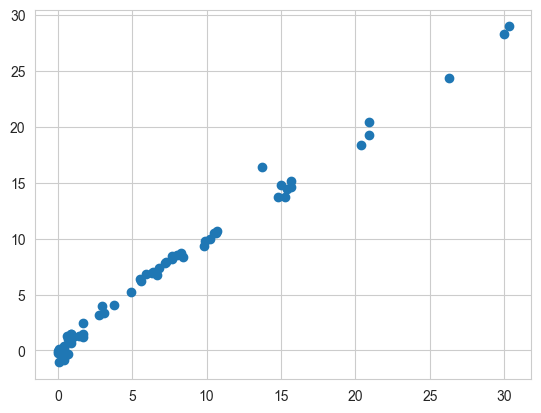

In [141]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [142]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

## Elasticnet Regression

Mean absolute error 1.9175981288141106
R2 Score 0.8752711247961272


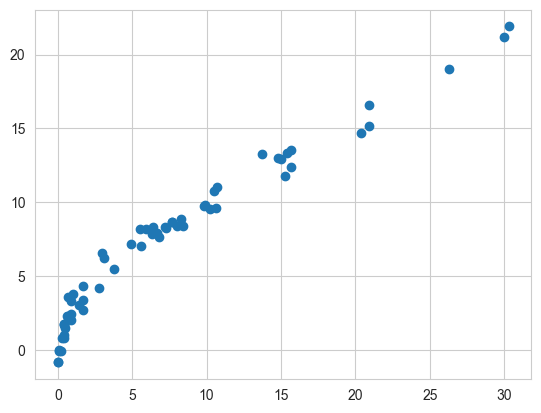

In [139]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## cross validation for elasticcv

Mean absolute error 0.6616282910488152
R2 Score 0.9871542613898666


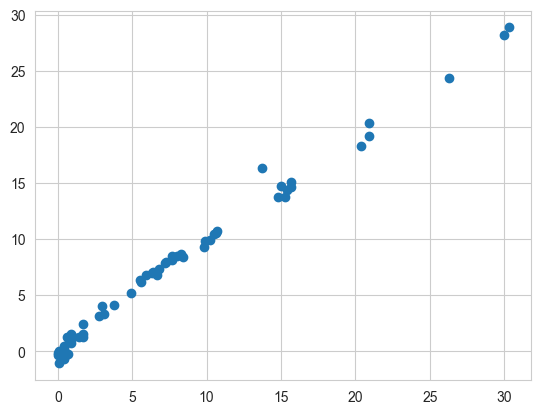

In [143]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)